## Radar Gage Intercomparisons

In [1]:
%matplotlib inline
%load_ext autoreload
from rain import *
from common import get_index, choose_group, map_rain, get_resample_kwargs
%aimport rain
%aimport common

In [353]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/Version1/'

In [355]:
rg = Rain(path=path, name='StLouis_MSD21_gage_{YEAR}.csv', year=2006, ngages=101, units='mm')

In [356]:
rg.ll_file = 'StLouis_MSD21_lat_lon.csv'

In [359]:
rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll

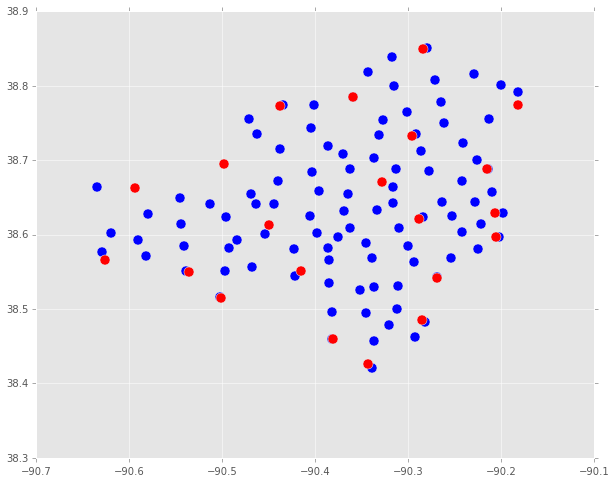

In [386]:
fig = plt.figure(figsize= (10,8))
ax = plt.axes(xlim=(-90.7, -90.1), ylim=(38.3, 38.9))
ax.scatter(x=df['lon'], y=df['lat'], s=100)
ax.scatter(x=df1['lon'], y=df1['lat'], s=100, c='red')
plt.savefig(p.save_path+'21 vs 101 gage locations.jpg')

In [372]:
df1 = rg.ll.join(pd.DataFrame(data={'none': [0]*21}, index=rg.ll.index))

In [370]:
df = p.ll.join(pd.DataFrame(data={'101': [0]*101}, index=p.ll.index)).join(pd.DataFrame(data={'21': [1]*21}, index=rg.ll.index))

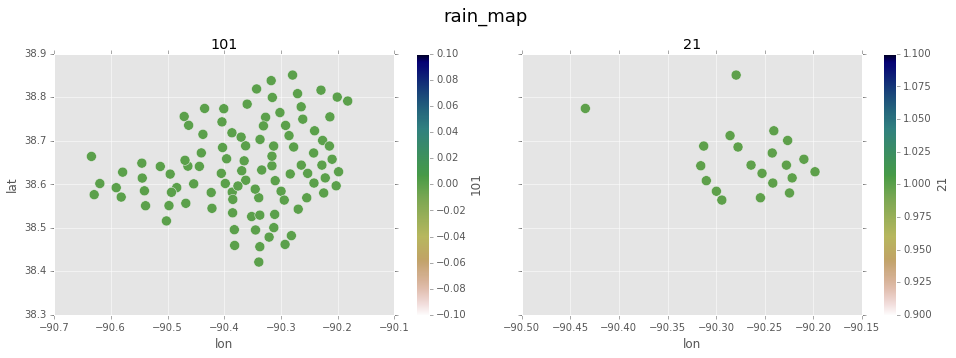

In [371]:
map_rain(df)

**Philadelphia: **

In [ ]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

rg = Rain(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")
rad = Rain(path=path, name="Phila_gage_{YEAR}_fill.dat", year=range(2003,2015))

**St. Louis: **

In [2]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/Version2/'

rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)

rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll

### Let's Explore!

In [358]:
%autoreload

In [3]:
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()
p.save_path = './output/test/'

You'll notice that RG101 only covers 2014. This can be misrepresentative when we are comparing data across all the years. For that reason we will set all of the values to NaN. 

In [6]:
p.rate.loc[:,:,'RG101'] = np.NaN

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


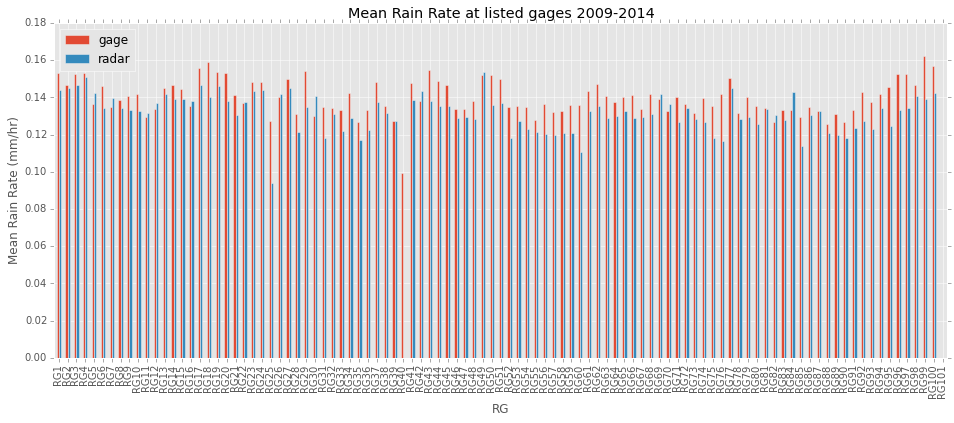

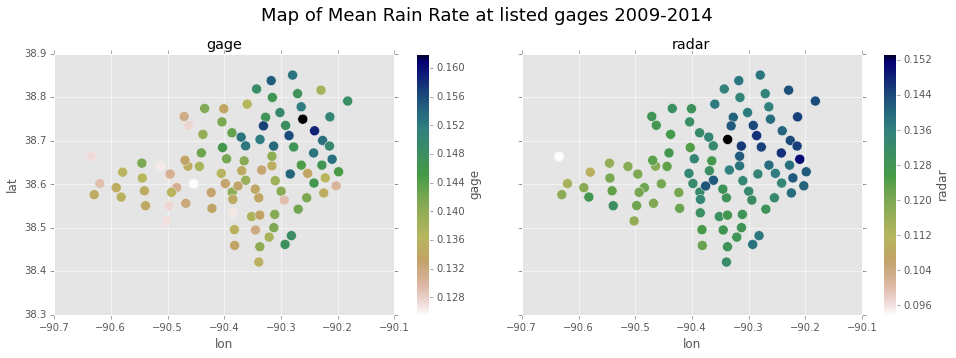

In [5]:
p.plot_rate(gage=list(get_index(p.rate, 'RG')[1]), map=True)

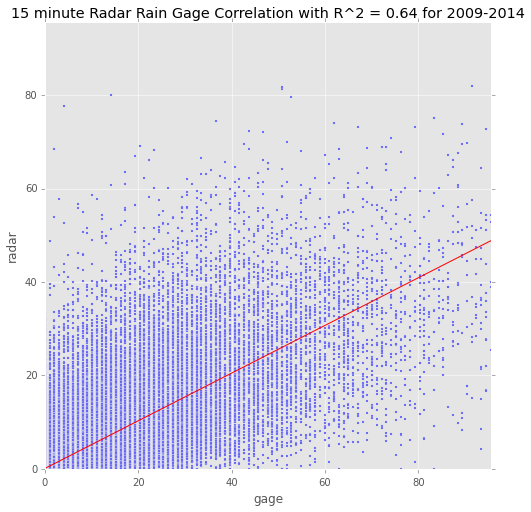

In [6]:
p.plot_correlation()

In [7]:
RMSE = (np.nanmean((p.df.gage-p.df.radar)**2))**.5
RMSE

1.0244701402211416

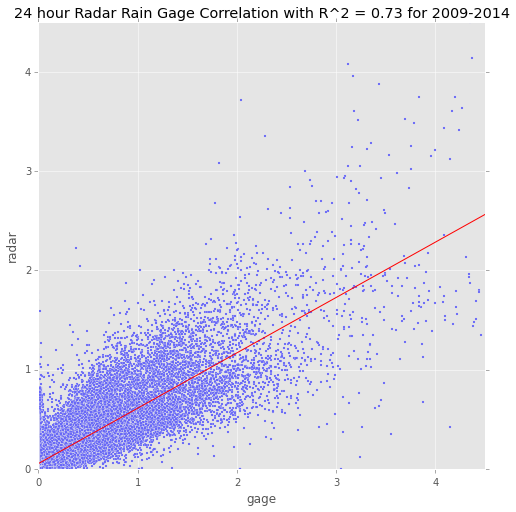

In [8]:
p.plot_correlation(time_step='24H', base=12)

In [9]:
RMSE = (np.nanmean((p.df.gage-p.df.radar)**2))**.5
RMSE

0.21393956010100867

### Comparison Plots of relative rain rates

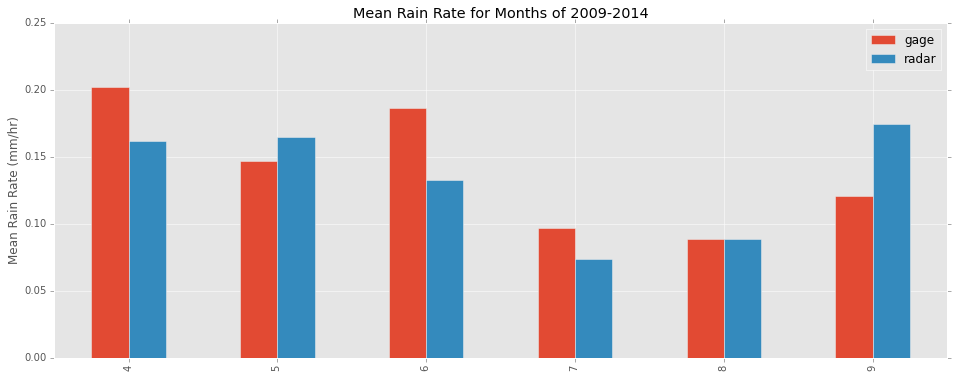

In [10]:
p.plot_rate(interval='seasonal')

In [ ]:
p.rate.groupby(p.rate.axes[1].month).mean().mean(axis=2).plot(kind='bar', figsize=(16,6))

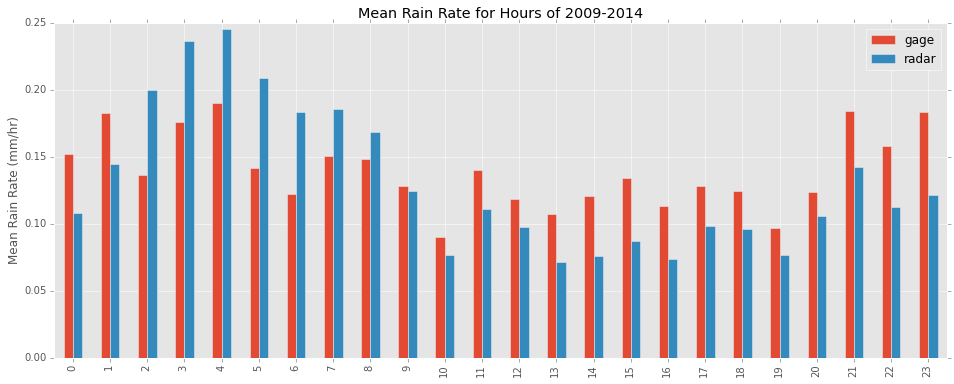

In [11]:
p.plot_rate(interval='diurnal')

In [ ]:
p.rate.groupby(p.rate.axes[1].hour).mean().mean(axis=2).plot(kind='bar', figsize=(16,6))

### Comparison of probabilities of rain

Choose you threshold carefully. You will notice that it makes a big difference in the results

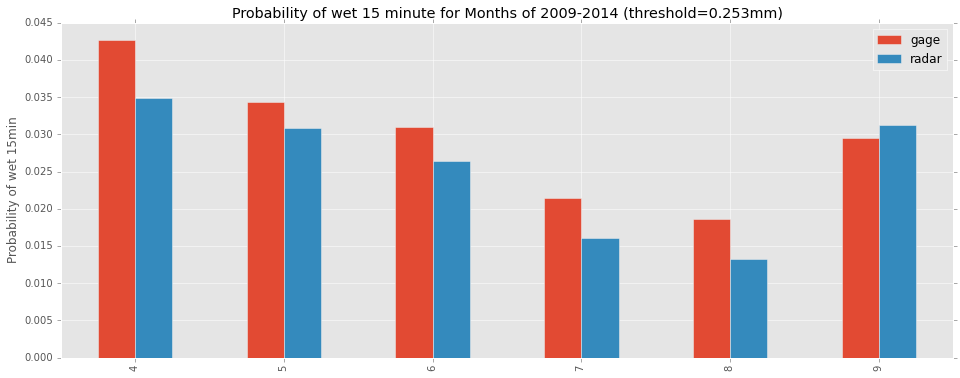

In [12]:
p.plot_prob_wet(interval='seasonal')

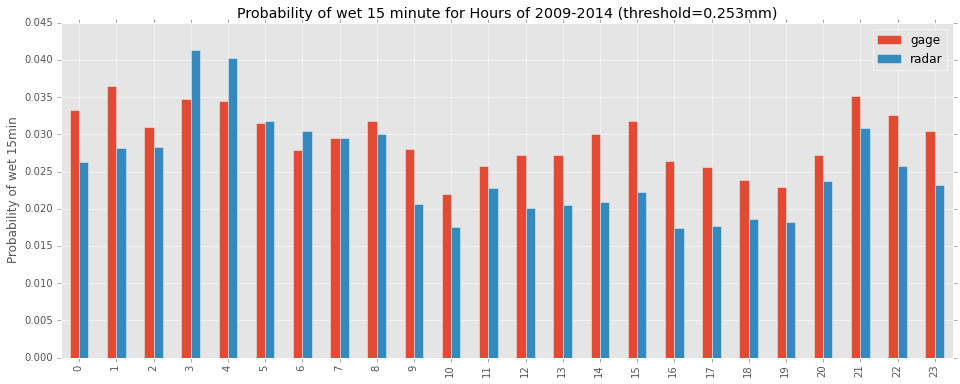

In [13]:
p.plot_prob_wet(interval='diurnal')

In [166]:
p.save_path

'./output/test/'

In [349]:
p.thresh = 25*4

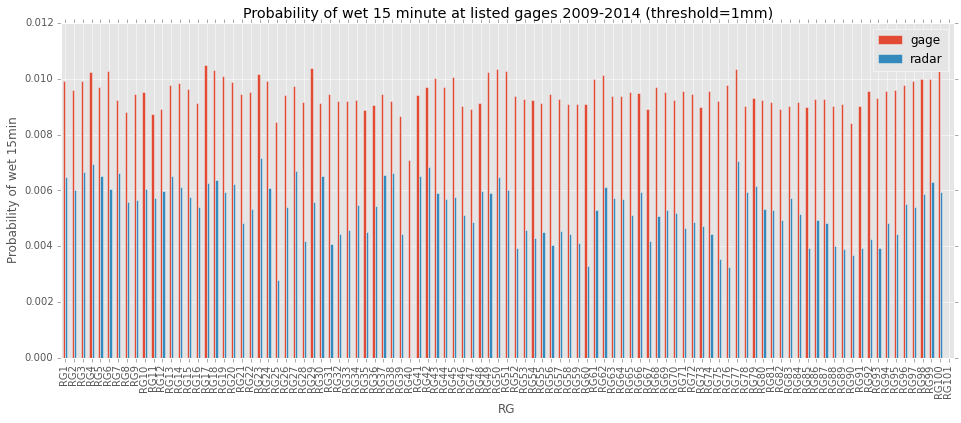

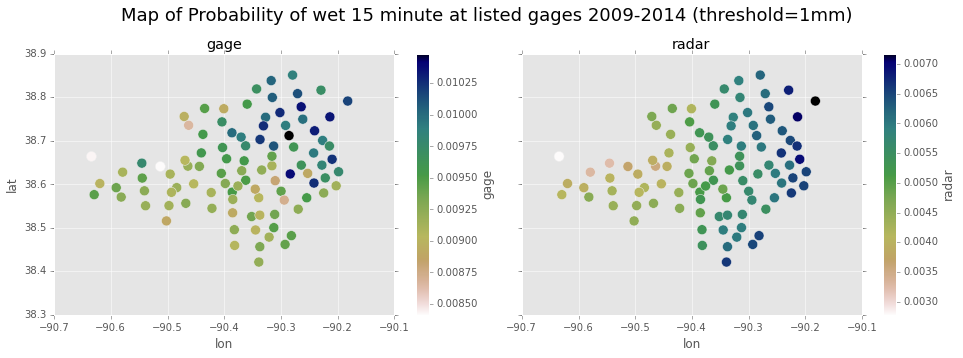

In [344]:
p.plot_prob_wet(gage=list(get_index(p.rate,'RG')[1]), map=True)

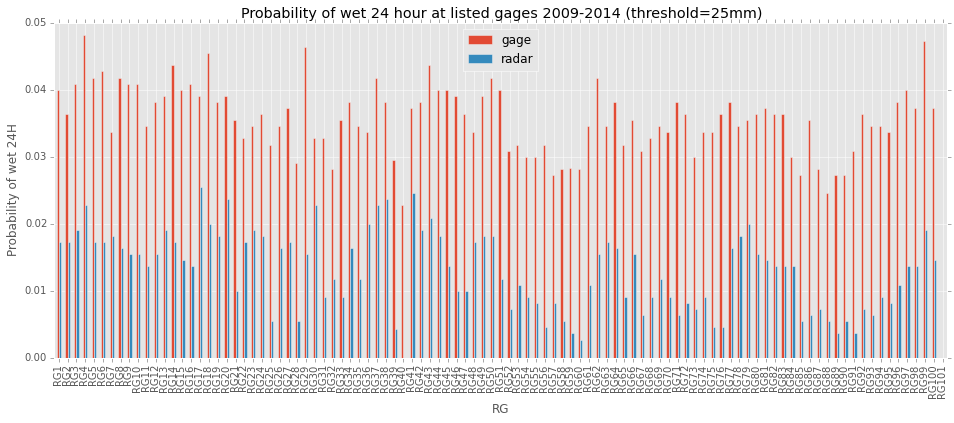

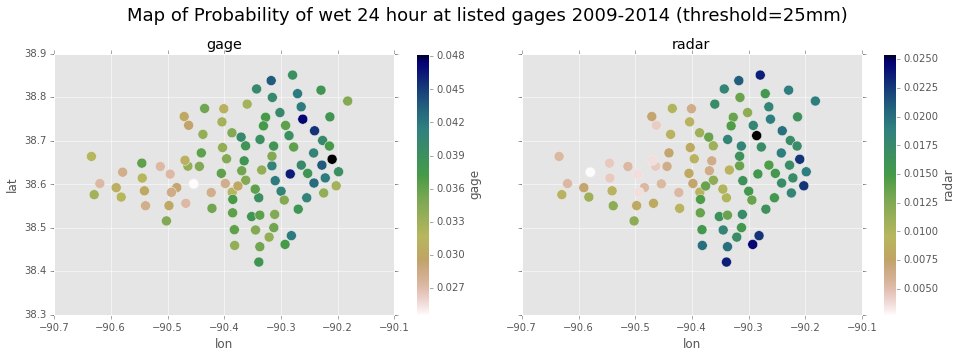

In [350]:
p.plot_prob_wet(gage=list(get_index(p.rate,'RG')[1]), time_step='24H', base=12, map=True)

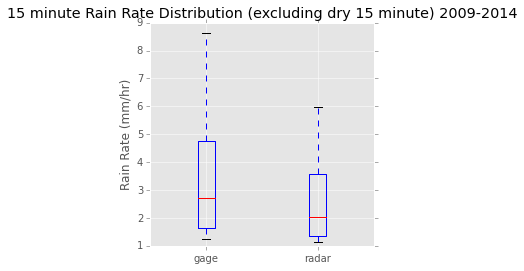

In [185]:
p.plot_boxplots()

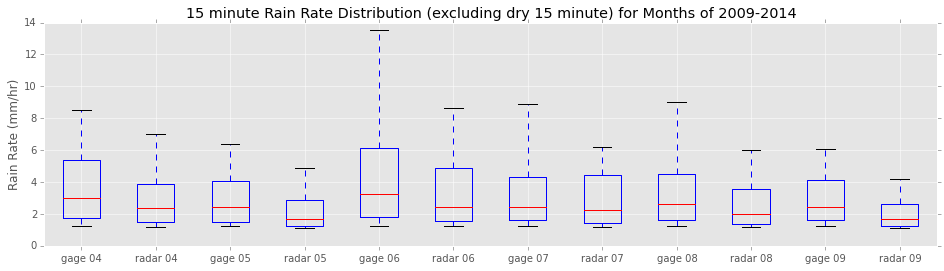

In [187]:
p.plot_boxplots(interval='seasonal', sort_by_type=False)

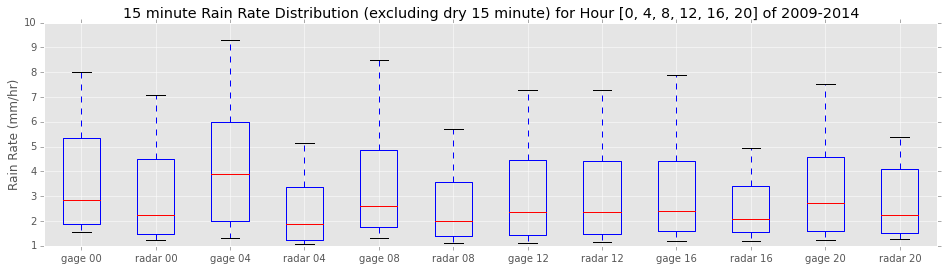

In [177]:
p.plot_boxplots(interval='diurnal', sort_by_type=False, h=range(0,24,4))

### Plot the rainfall in space using shaded points

In [16]:
daily = p.rate.resample('24H', base=12, **get_resample_kwargs(p.rate))
day = p.ll.join(daily.to_frame().loc['2011-06-26 12:00:00'])
day = day[day.lat > -200]

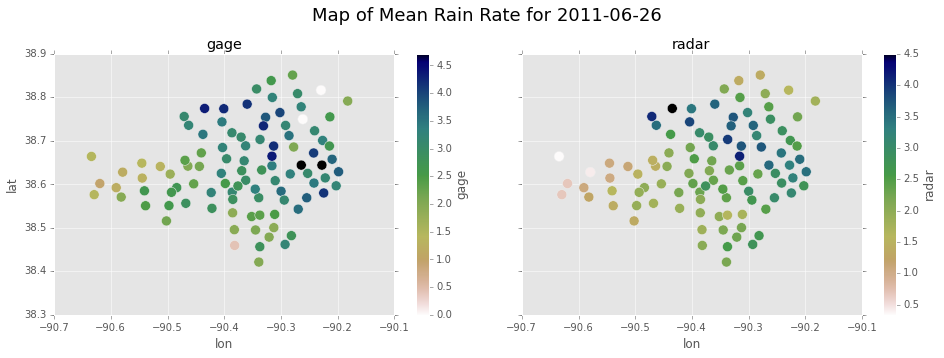

In [17]:
map_rain(day, p.save_path, 'Map of Mean Rain Rate for 2011-06-26')

### Find large events

In [21]:
p.get_rainiest(10)

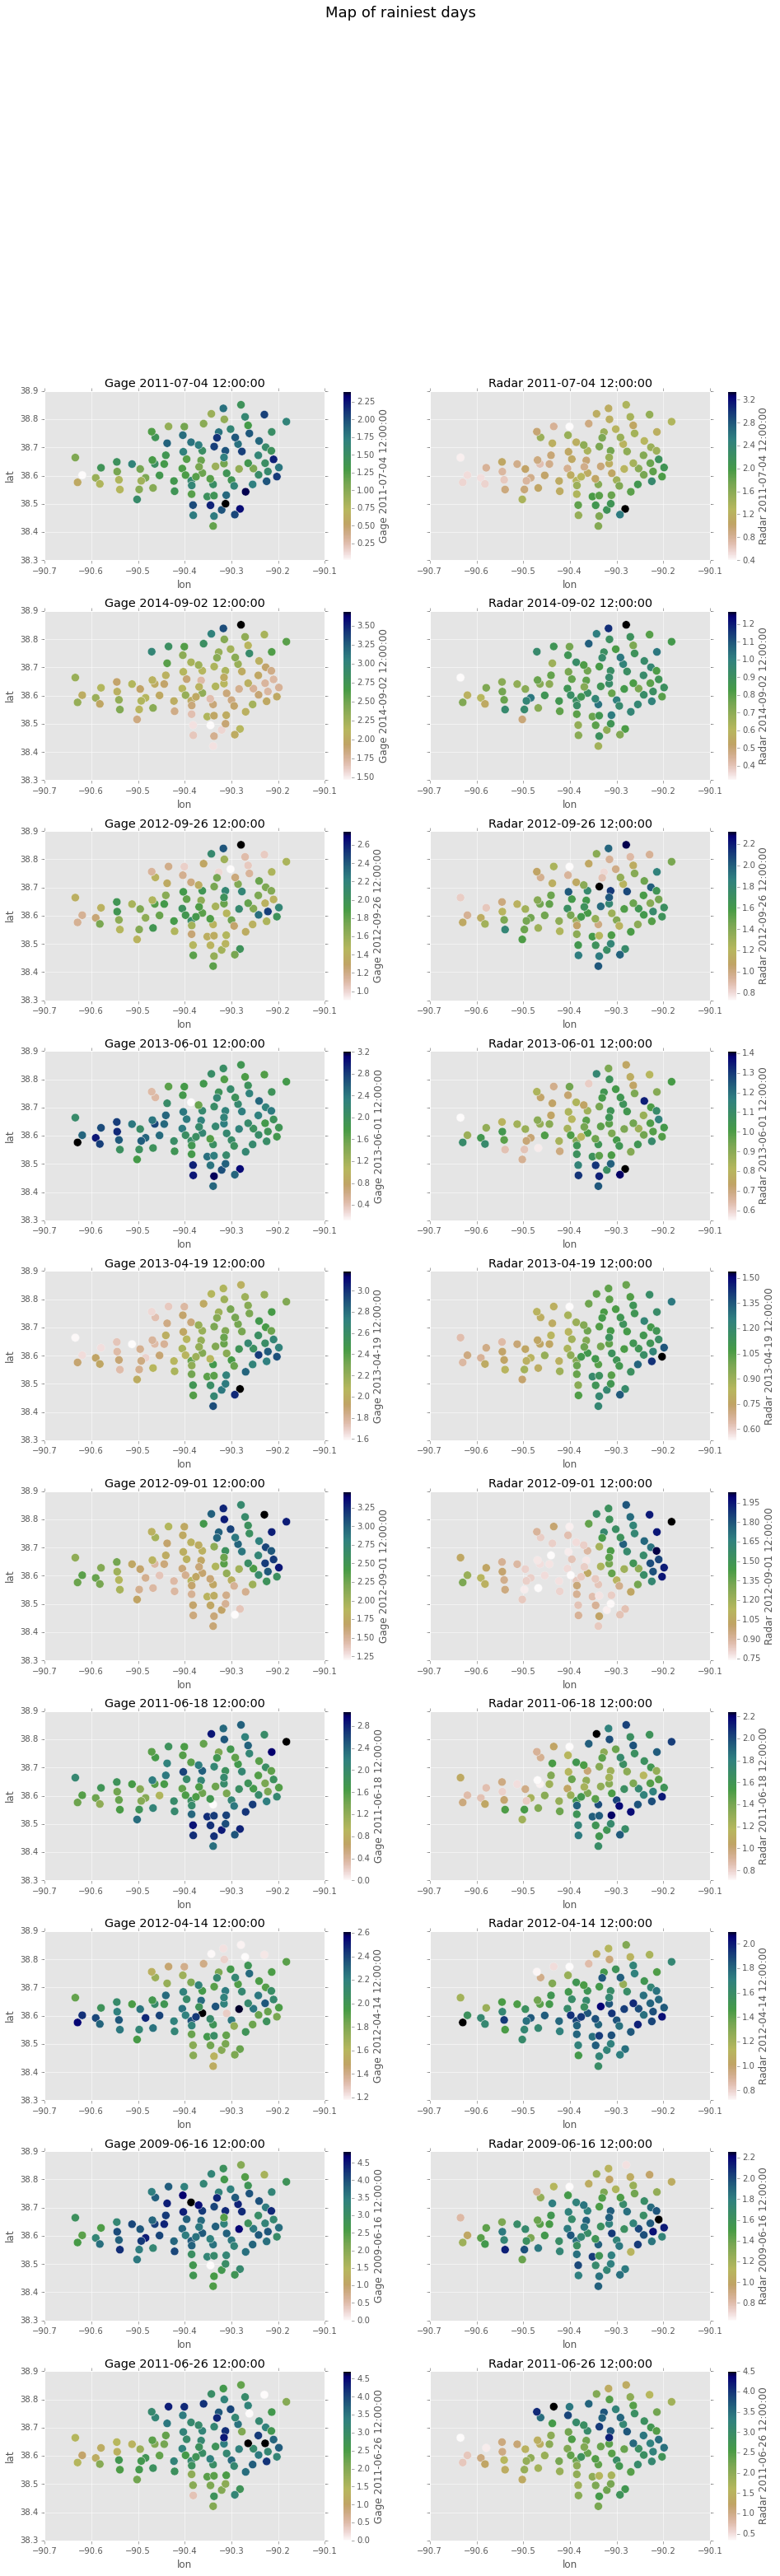

In [24]:
map_rain(p.rainiest, save_path='./output/StLouis/', title='Map of rainiest days')

### Make animated plots of gage and radar through time

In [187]:
from JSAnimation import IPython_display
from matplotlib import animation

In [318]:
rainiest = [col.split()[1] for col in p.rainiest.columns[range(6, 26,2)]]

In [335]:
rgb.max().max()

108.712

In [331]:
rainiest[-2]

'2009-06-16'

In [332]:
sec = p.rate.loc[:,'2009-06-15':'2009-06-17',:]
sec = sec.gage[sec.gage.sum(axis=1) > p.thresh]
df = p.ll.join(sec.transpose())
rgb = df[df.columns[5:]]


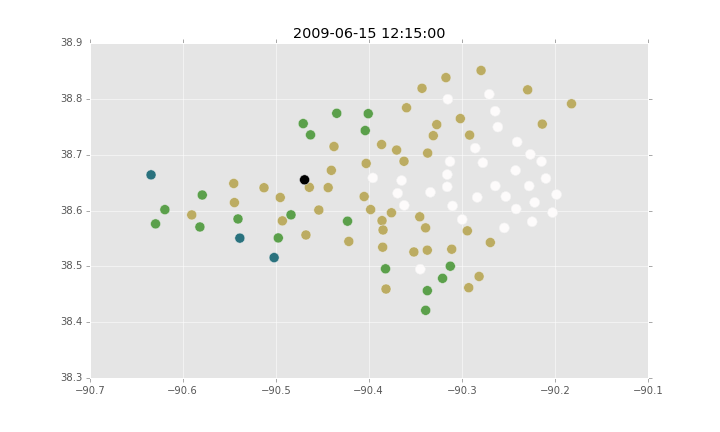
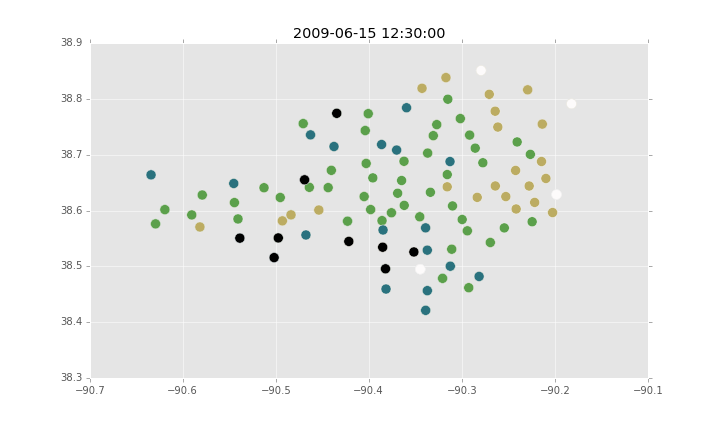
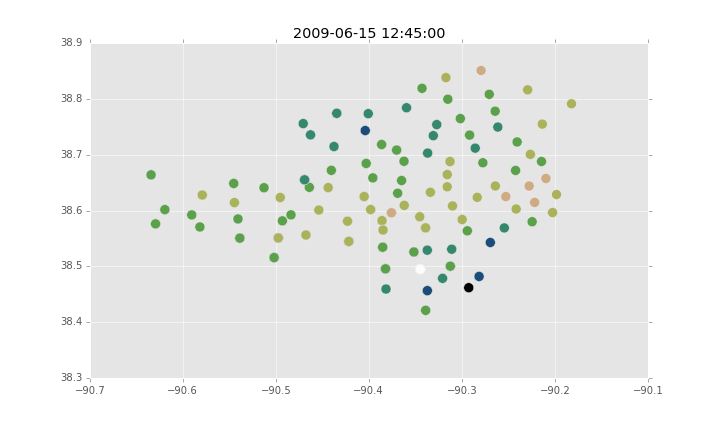
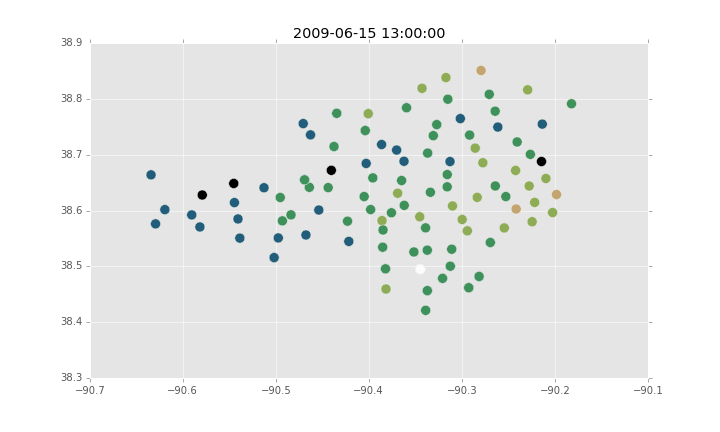
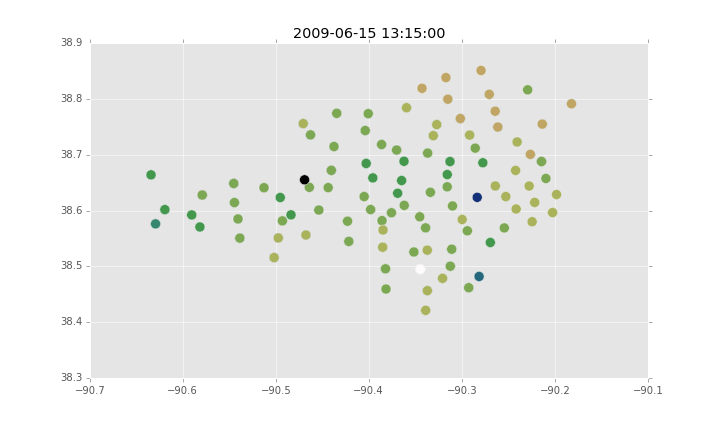
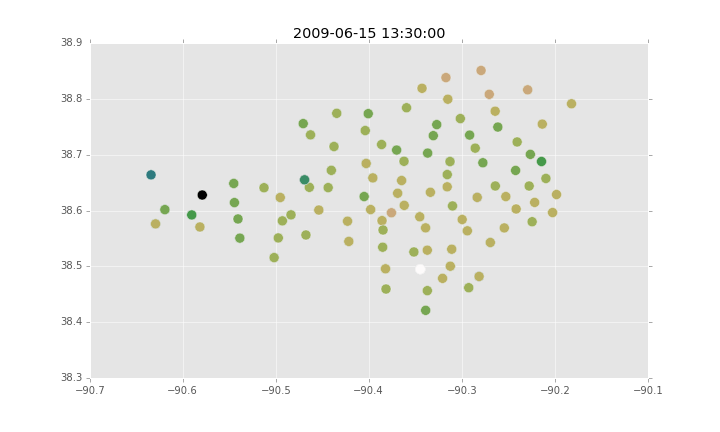
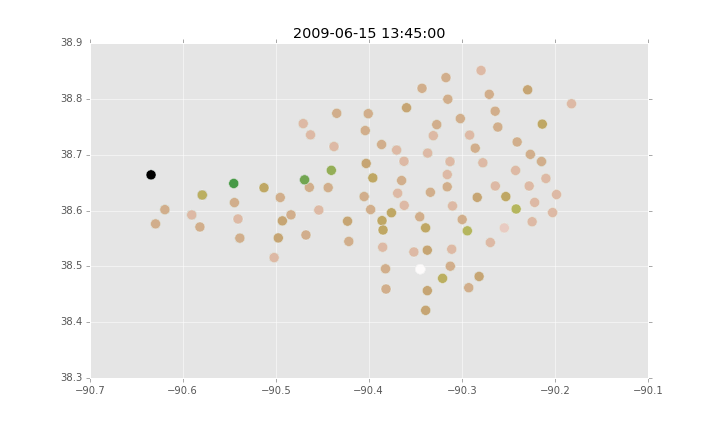
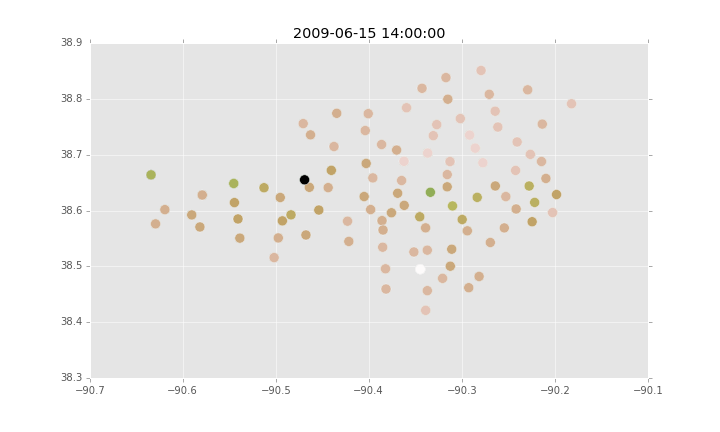
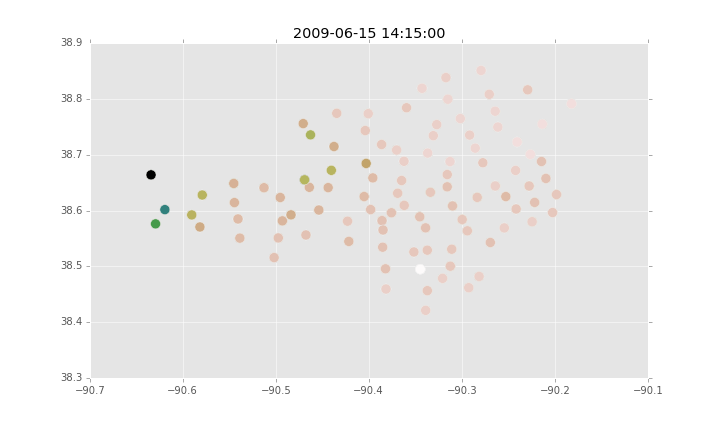
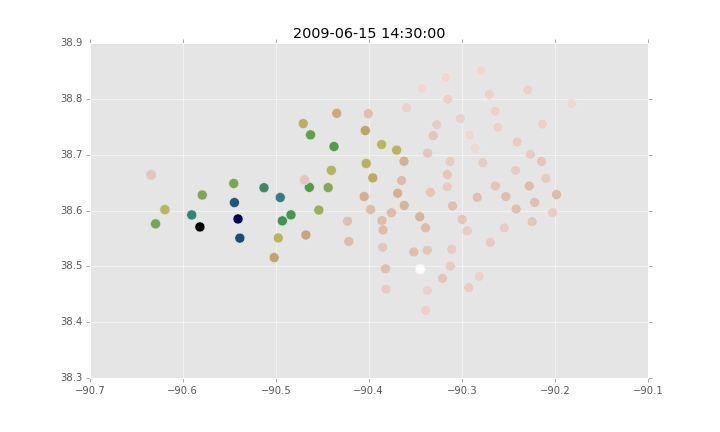
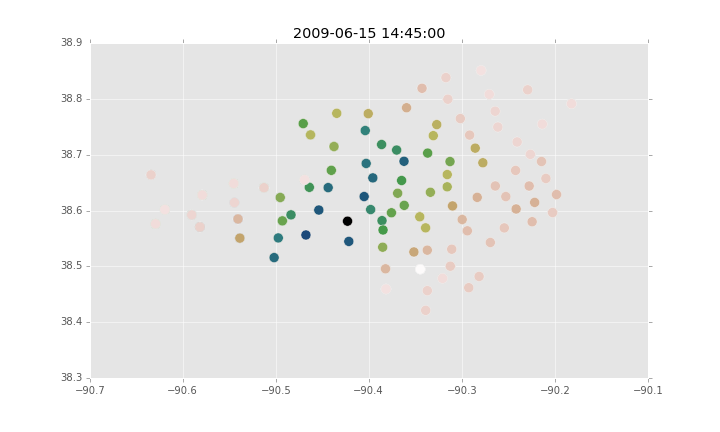
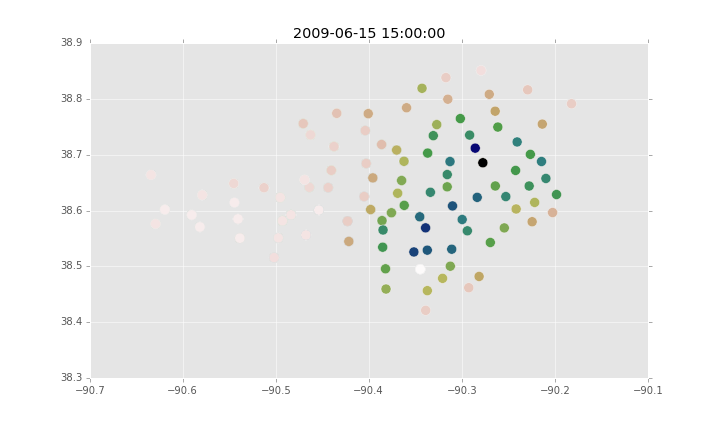
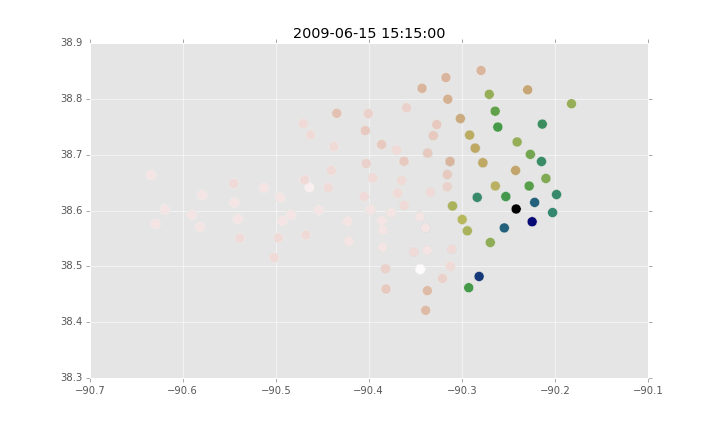
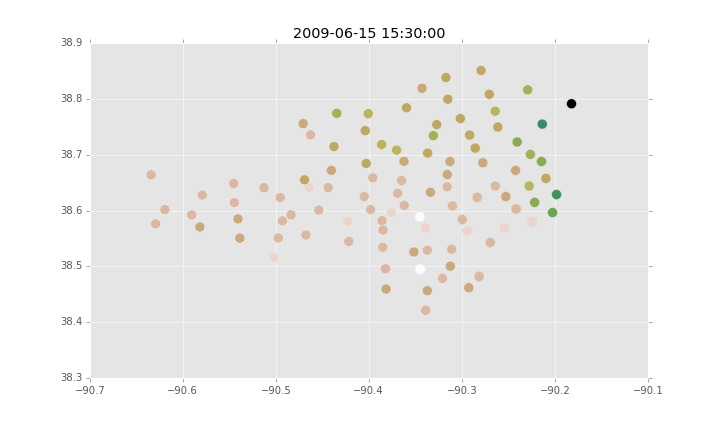
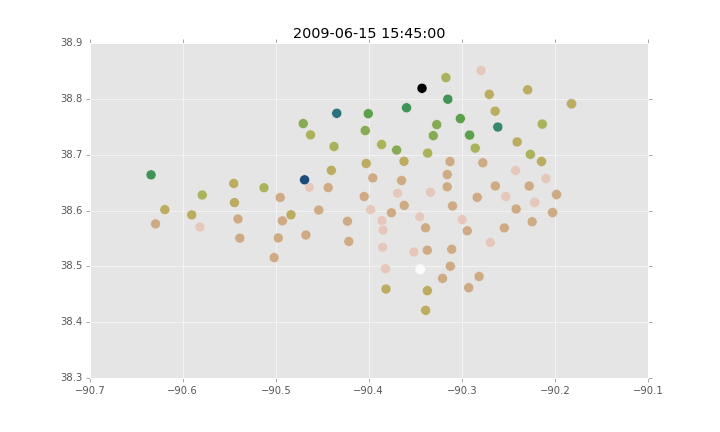
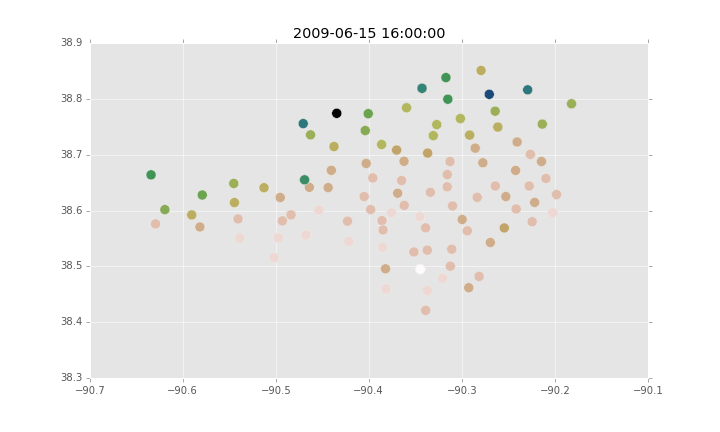
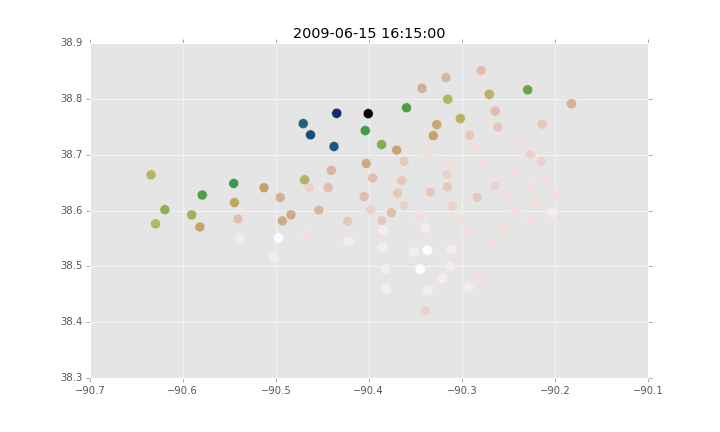
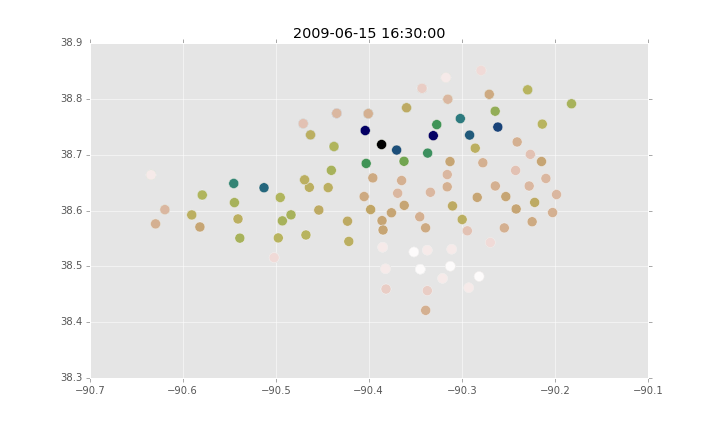
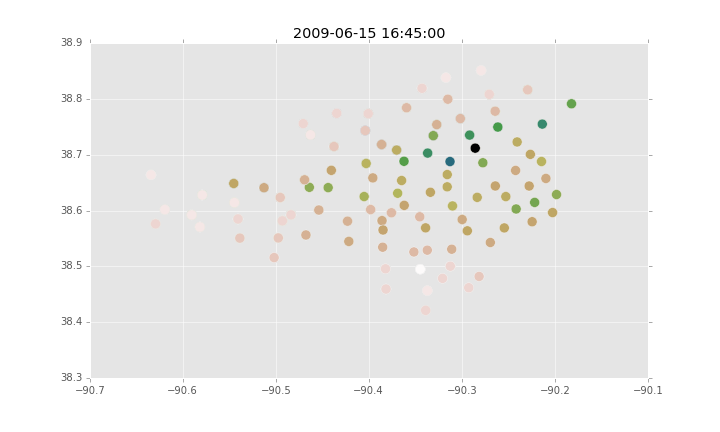
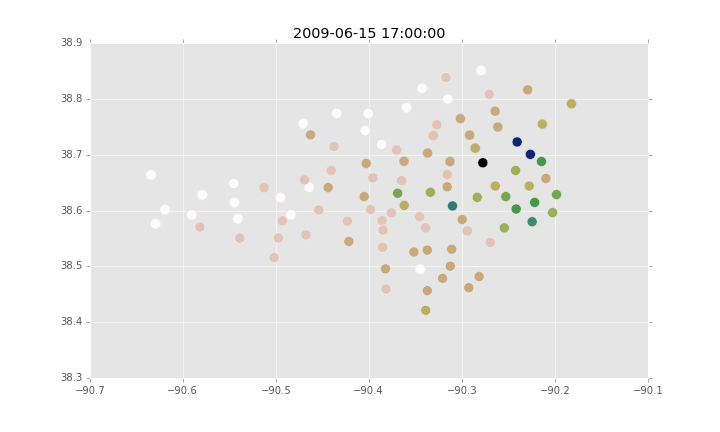
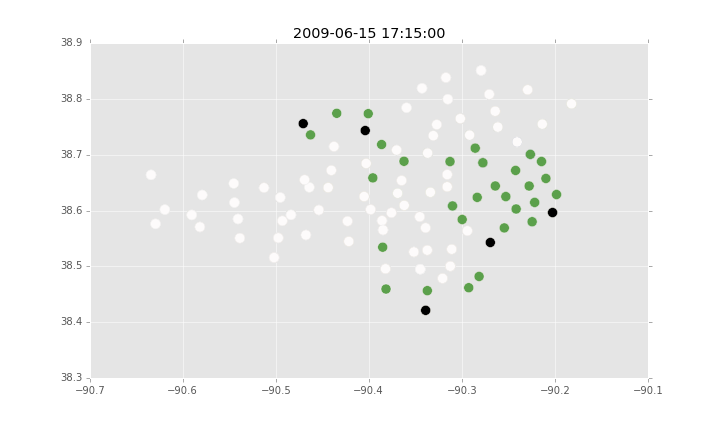
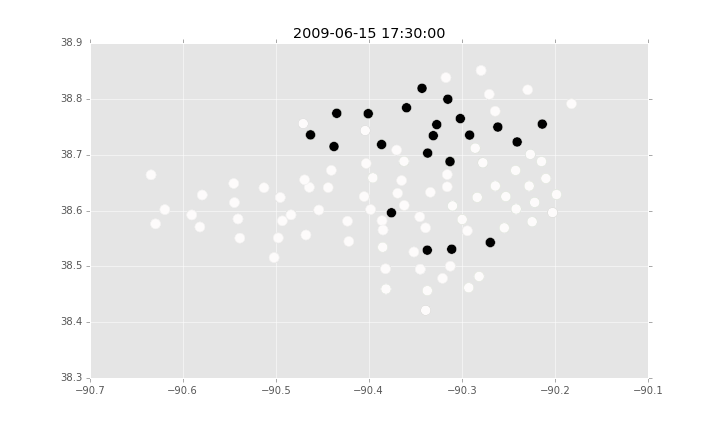
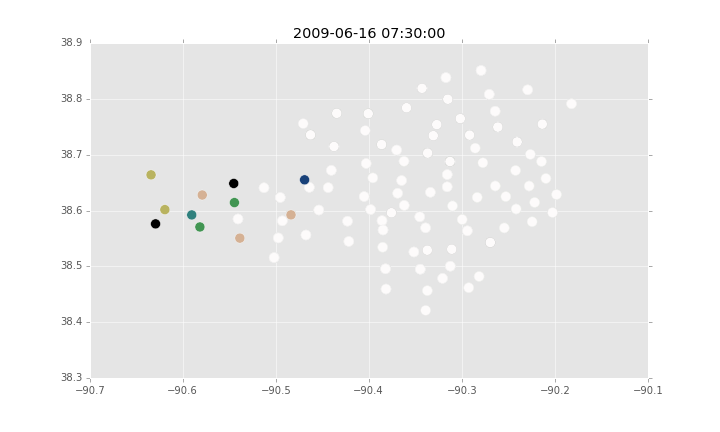
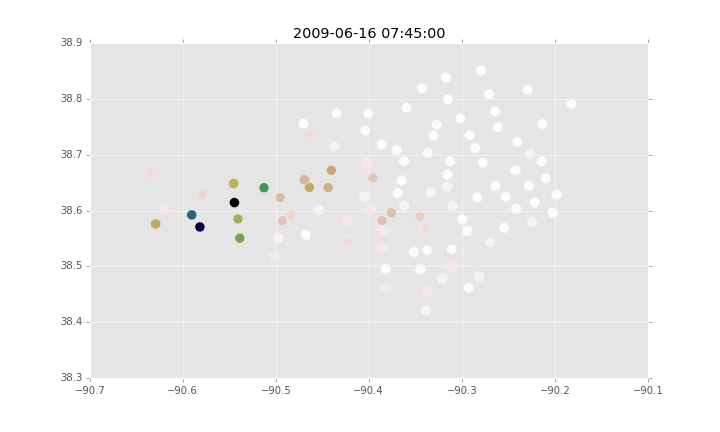
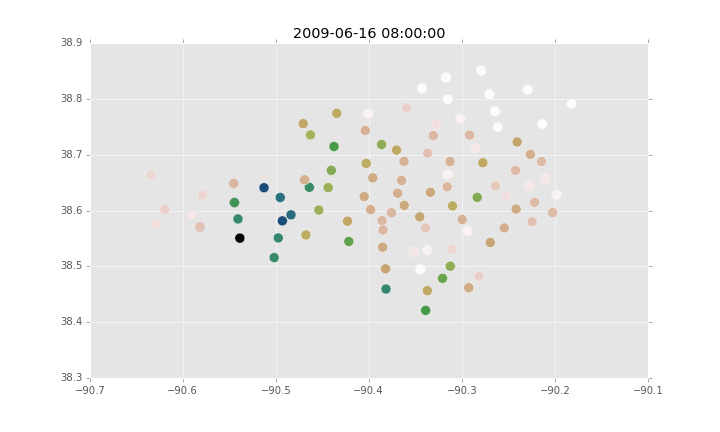
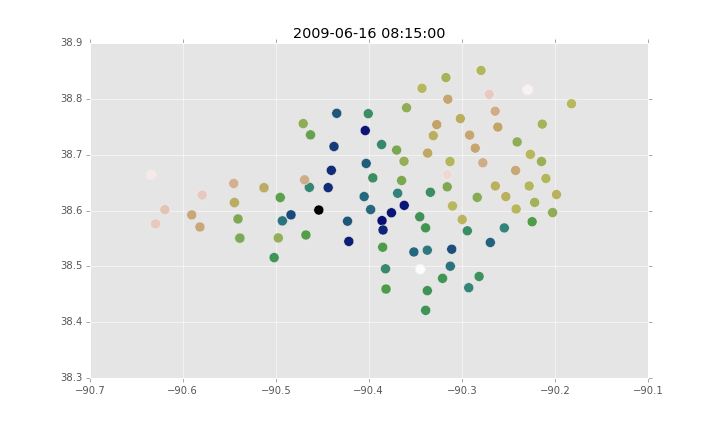
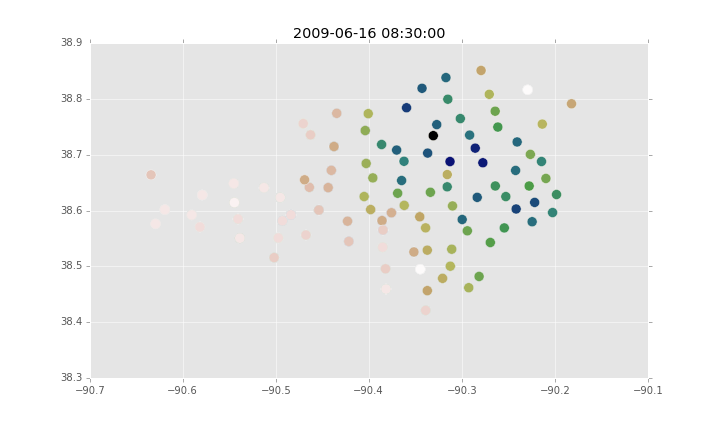
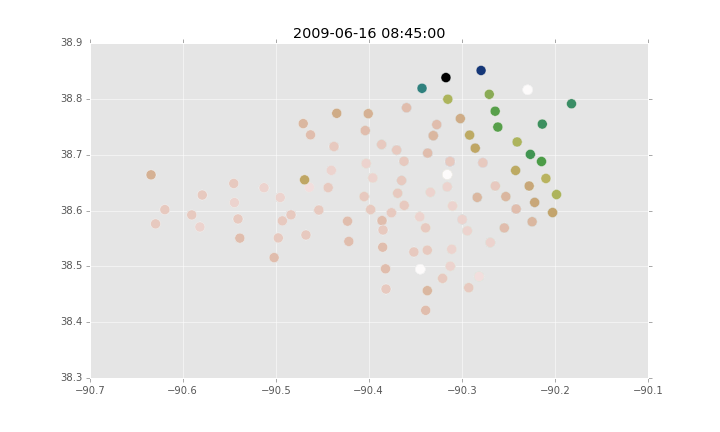
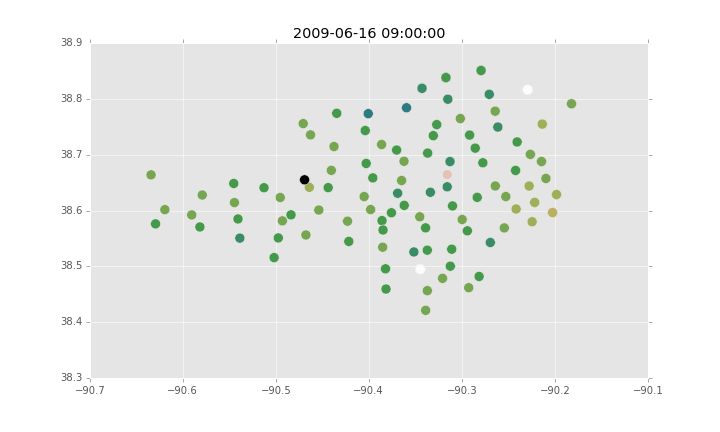
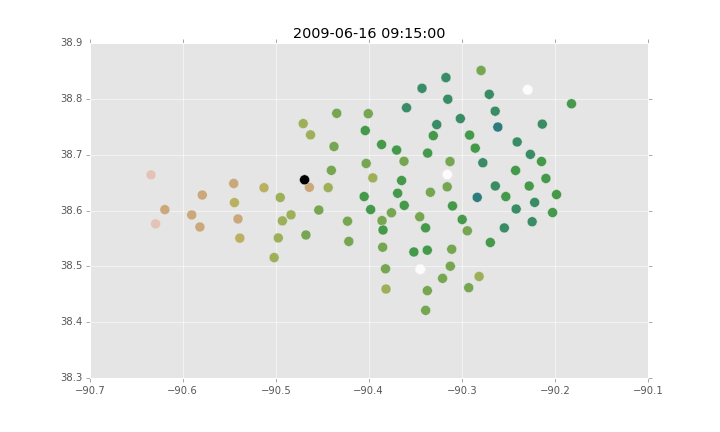
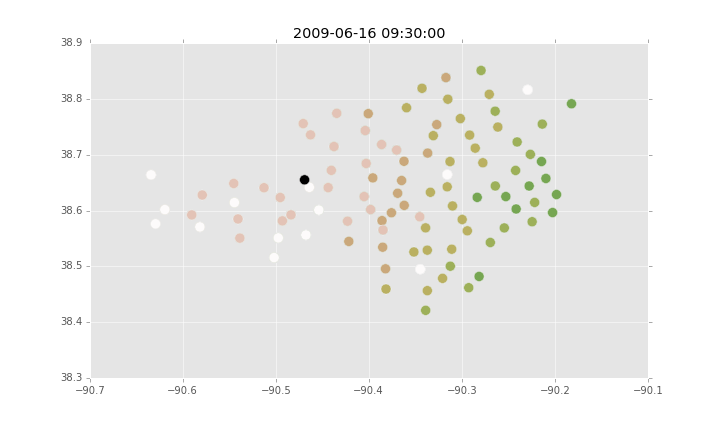
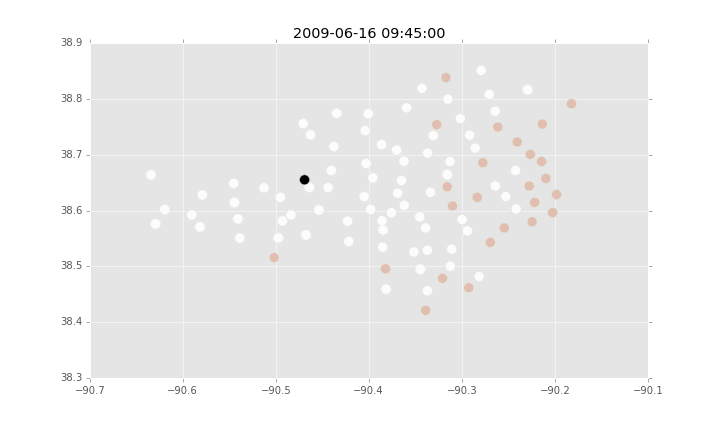
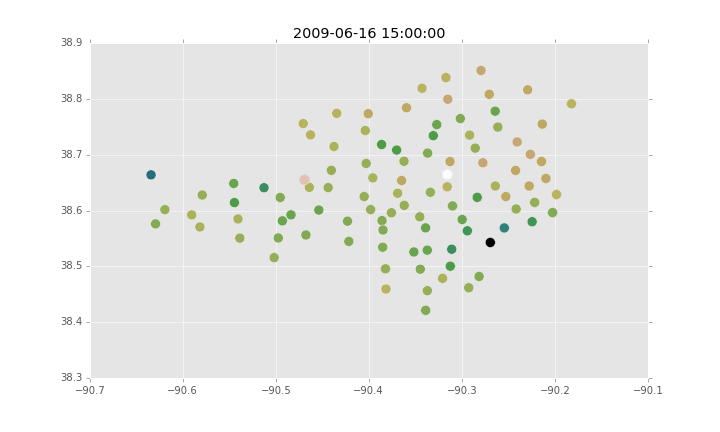
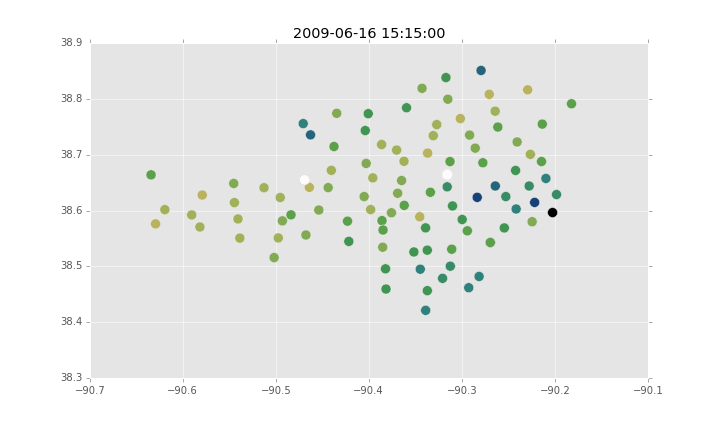
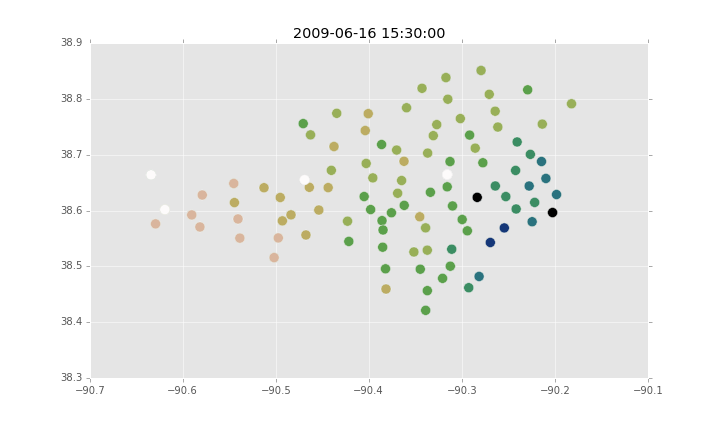
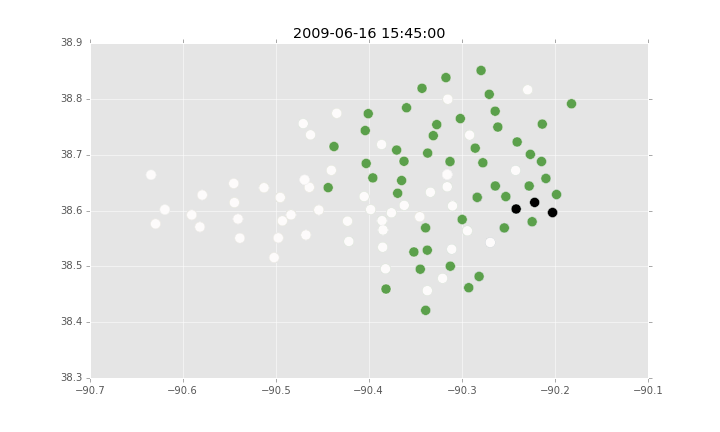

In [340]:
fig = plt.figure(figsize= (10,6))
ax = plt.axes(xlim=(-90.7, -90.1), ylim=(38.3, 38.9))

def animate(i):
    ax.set_title(rgb[[i]].columns[0])
    scat = ax.scatter(x=df['lon'], y=df['lat'], cmap='gist_earth_r', c=rgb[[i]].values, s=100)
    return scat

animation.FuncAnimation(fig, animate, frames=len(rgb.columns), interval=100, blit=True)

In [351]:
sec = p.rate.loc[:,'2009-06-15':'2009-06-17',:]
sec = sec.radar[sec.radar.sum(axis=1) > p.thresh]
df = p.ll.join(sec.transpose())
rgb_rad = df[df.columns[5:]]


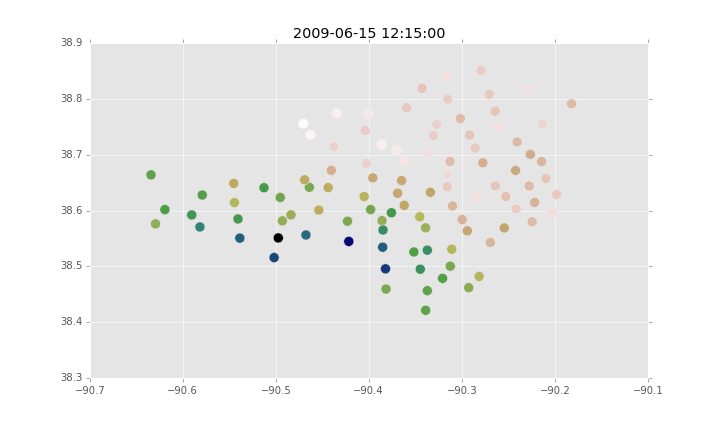
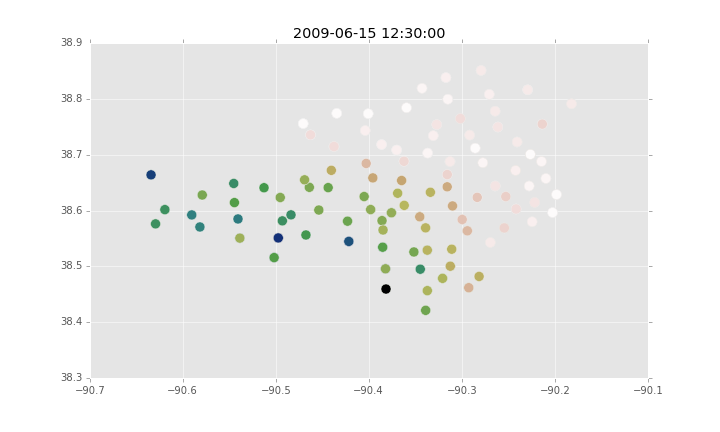
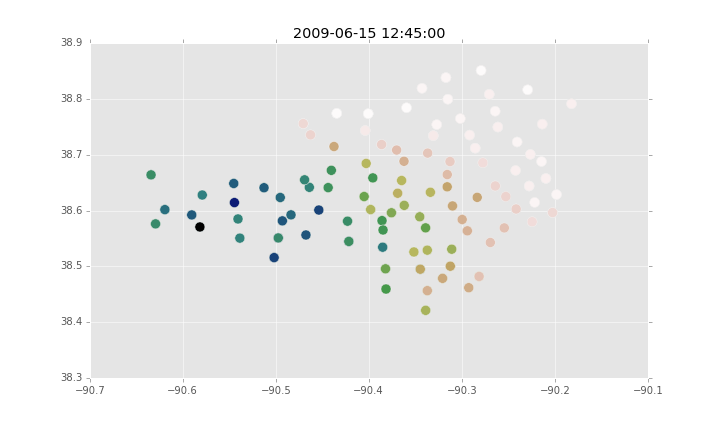
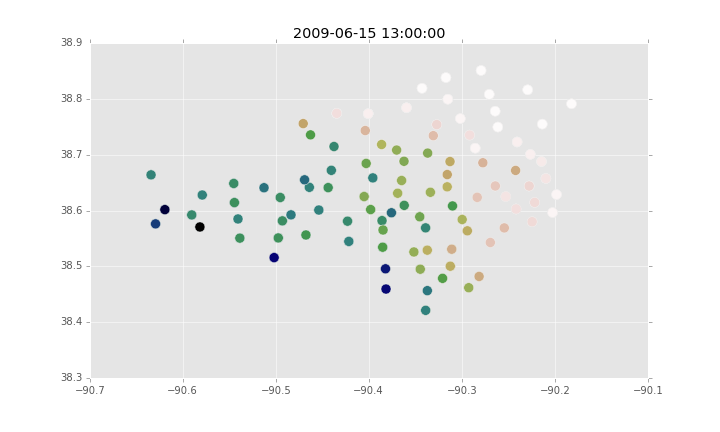
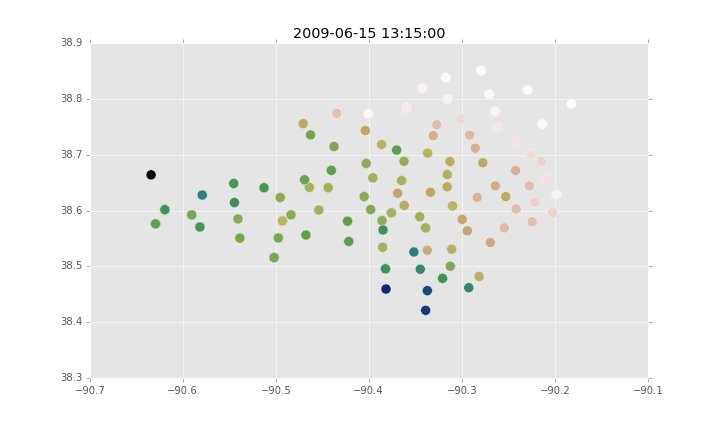
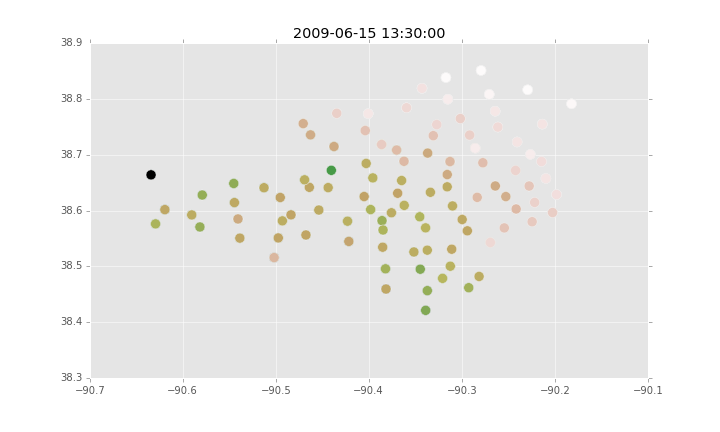
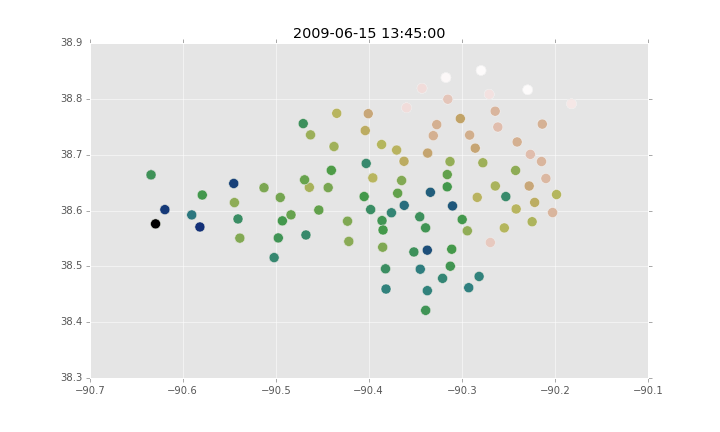
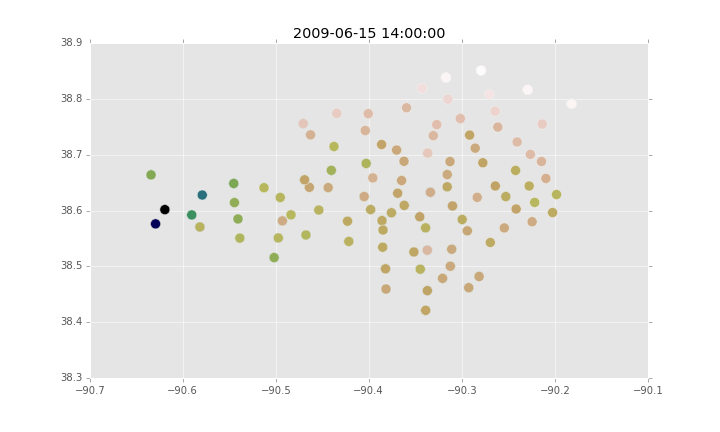
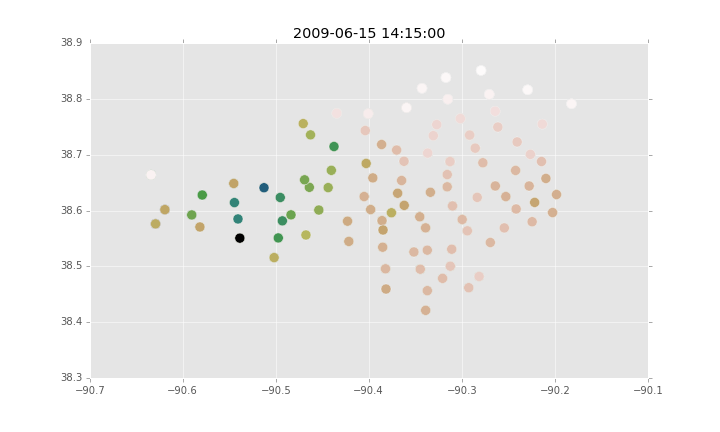
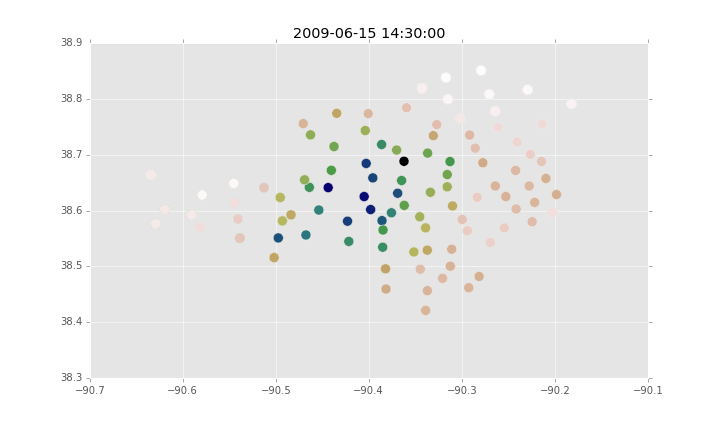
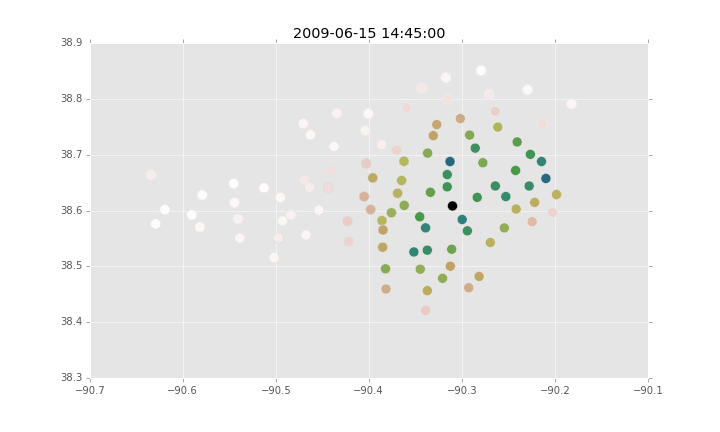
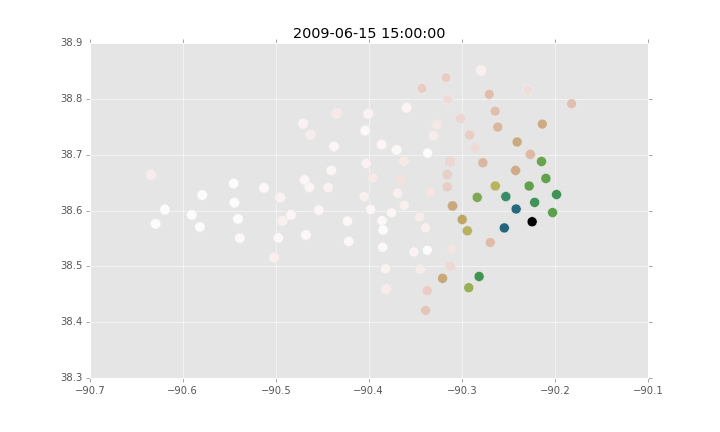
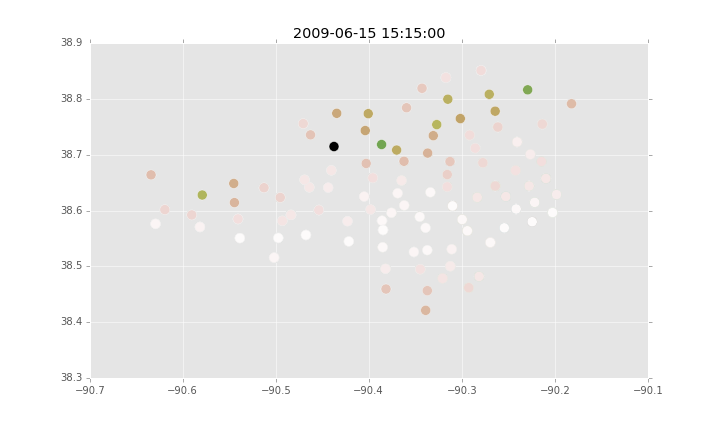
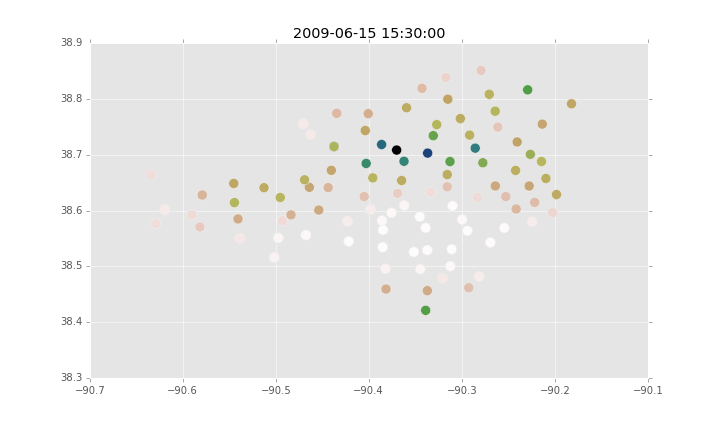
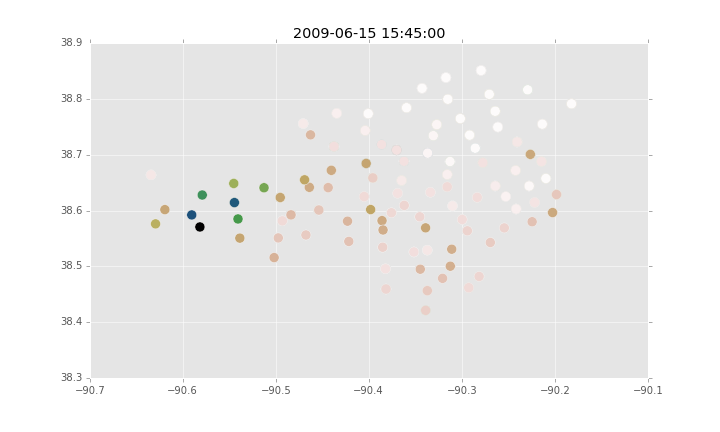
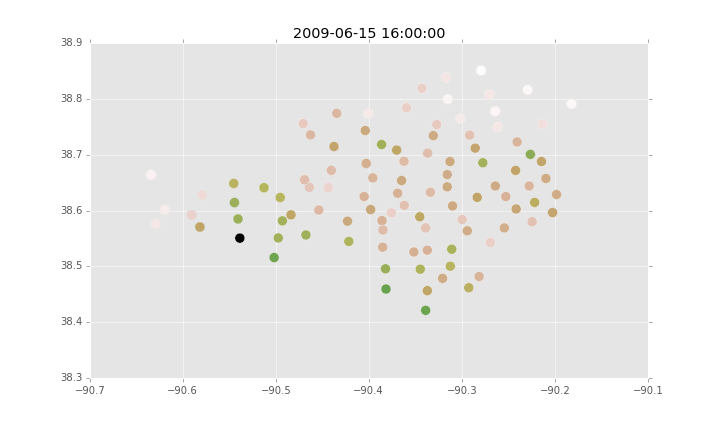
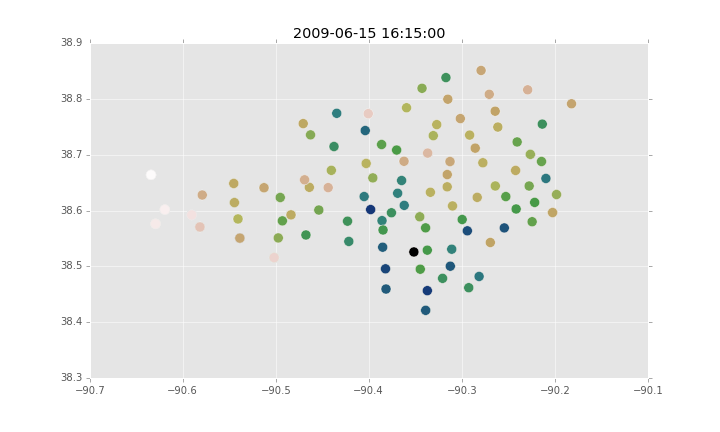
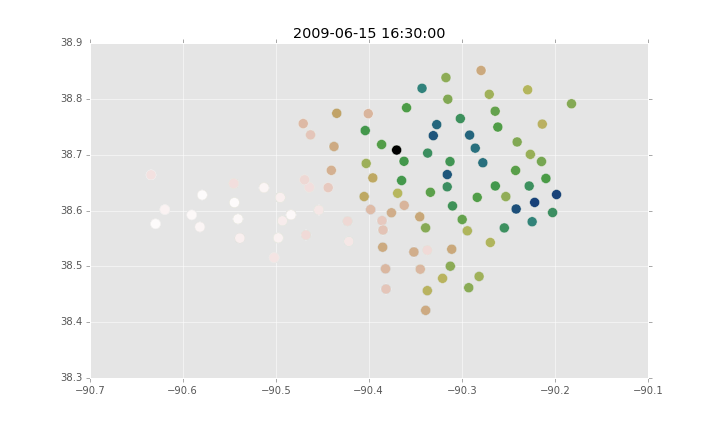
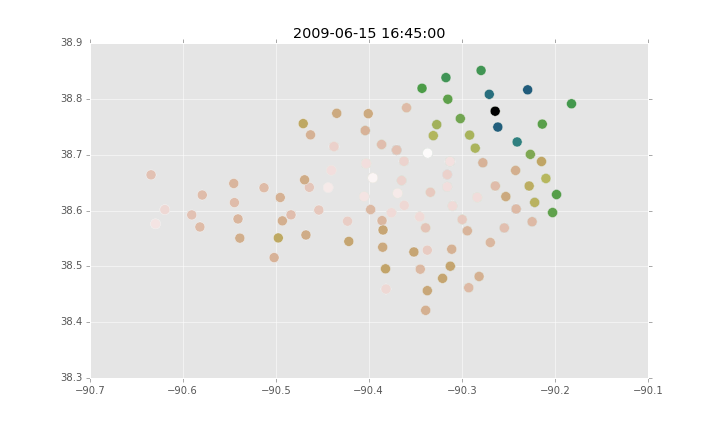
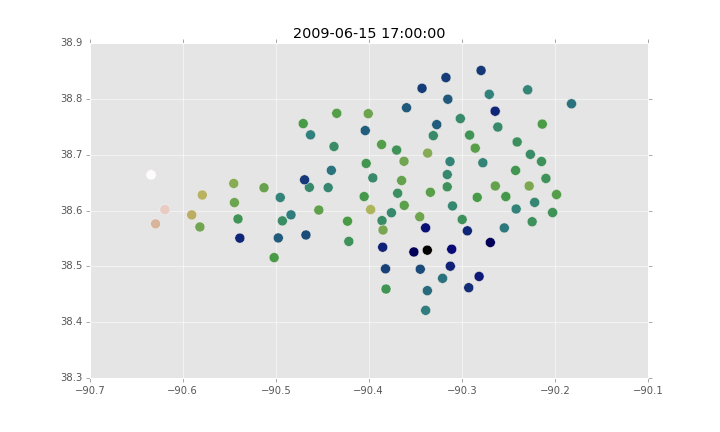
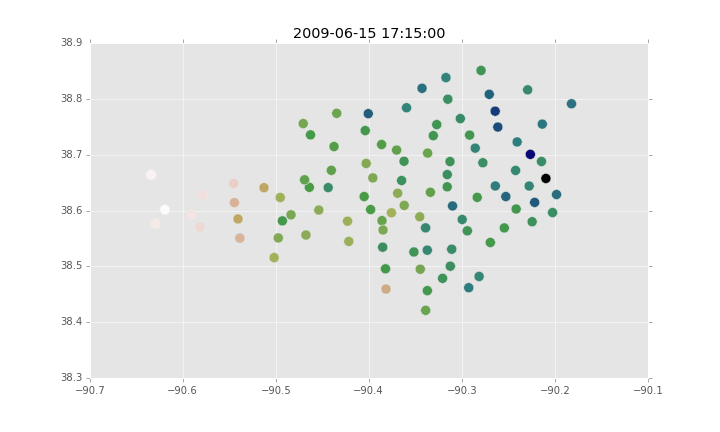
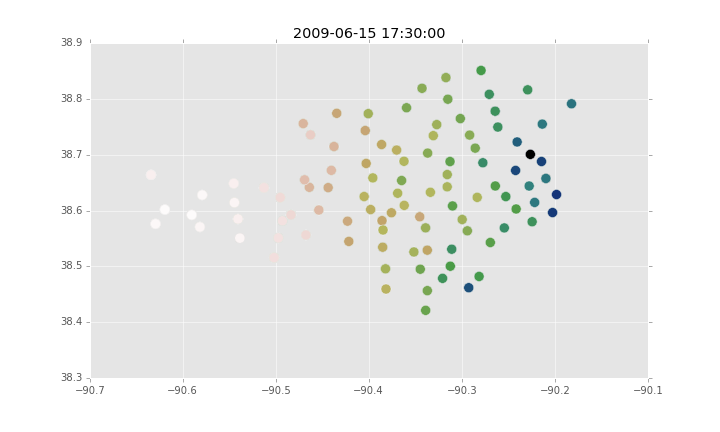
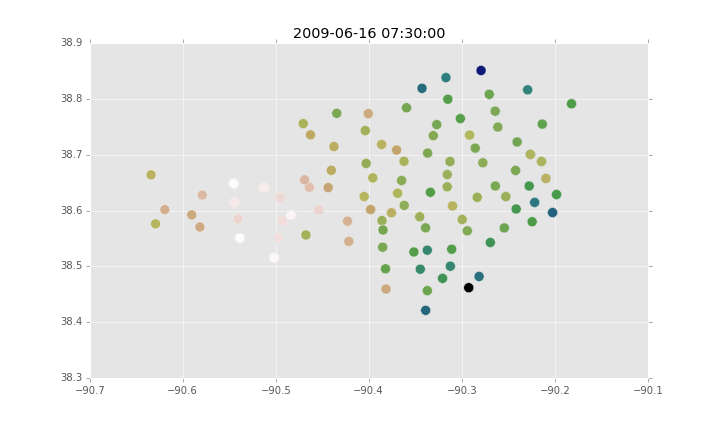
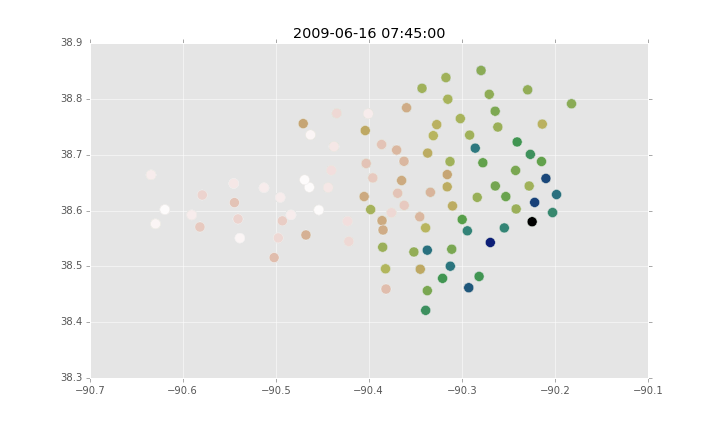

In [352]:
fig = plt.figure(figsize= (10,6))
ax = plt.axes(xlim=(-90.7, -90.1), ylim=(38.3, 38.9))

def animate(i):
    ax.set_title(rgb[[i]].columns[0])
    scat = ax.scatter(x=df['lon'], y=df['lat'], cmap='gist_earth_r', c=rgb_rad
                      [[i]].values, s=100)
    return scat

animation.FuncAnimation(fig, animate, frames=len(rgb_rad.columns), interval=100, blit=True)